### Library Import

In [1]:
import pandas as pd
import numpy as np

from models.utility import load_input, scale_with_minmax, generate_sequences, get_dates_from_config, handle_outliers, get_params_from_config, convert_seq_to_df, dailydf_to_ts, inverse_transform_minmax
from models.lstm import simpleLSTM
from models.deeplearner import DeepLearner

from solutil import evaluations

### Input Preparation

In [2]:
# Define global variables
str_model = 'inlet1_lstm'

In [3]:
# Load Input Parameters
dates = get_dates_from_config(str_model)
df_variables = load_input(str_model=str_model, **dates)

There are some outliers in the data, as can be seen from the following plot.

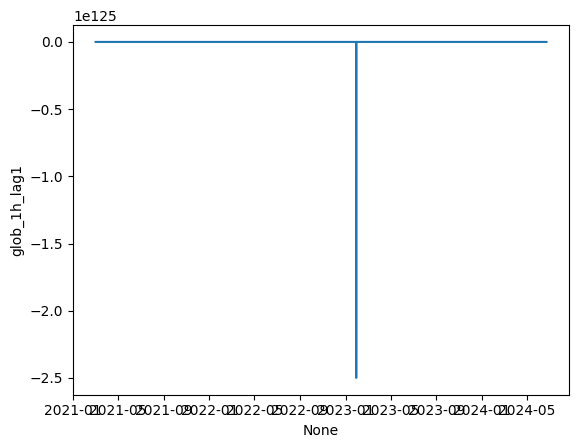

In [4]:
import seaborn as sns

fig = sns.lineplot(x=df_variables.index, y=df_variables['glob_1h_lag1'])

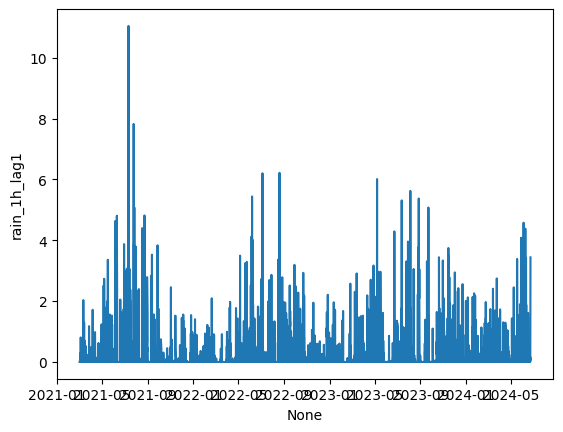

In [5]:
fig = sns.lineplot(x=df_variables.index, y=df_variables['rain_1h_lag1'])

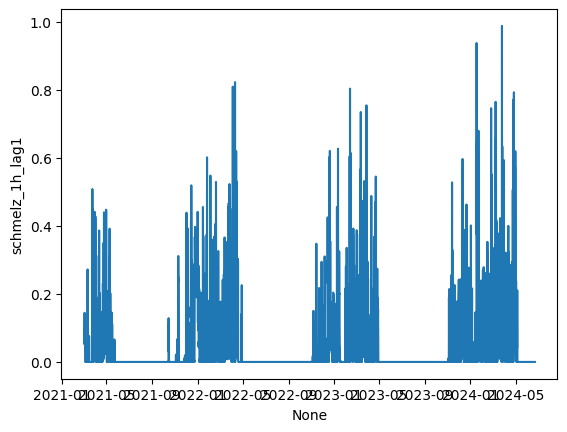

In [6]:
fig = sns.lineplot(x=df_variables.index, y=df_variables['schmelz_1h_lag1'])

In [7]:
# Handle outliers
df_handled = handle_outliers(df_variables)

Variable base_lag0
Variable base_1d_lag1
Variable temp_1h_lag1
Variable glob_1h_lag1
Variable glob_1h_lag2
Variable glob_1h_lag3
Variable rain_1h_lag1
Variable rain_1h_lag2
Variable rain_1h_lag3
Variable bf15_1h_lag0
Variable bf15_1h_lag1
Variable bf15_1h_lag2
Variable bf15_1h_lag3
Variable schmelz_1h_lag1
Variable schmelz_1h_lag2
Variable schmelz_1h_lag3


In [8]:
df_handled

,base_lag0,base_1d_lag1,temp_1h_lag1,glob_1h_lag1,glob_1h_lag2,glob_1h_lag3,rain_1h_lag1,rain_1h_lag2,rain_1h_lag3,bf15_1h_lag0,bf15_1h_lag1,bf15_1h_lag2,bf15_1h_lag3,schmelz_1h_lag1,schmelz_1h_lag2,schmelz_1h_lag3
2021-03-02 00:00:00+01:00,1.575118,1.714555,3.056250,0.000000,67.564583,471.766667,0.000000,0.000000,0.000000,1.126800,1.131625,1.134725,1.138850,0.054175,0.041675,0.068325
2021-03-02 04:00:00+01:00,1.425177,1.616138,3.485418,0.000000,0.000000,67.564583,0.000000,0.000000,0.000000,1.123125,1.126800,1.131625,1.134725,0.056250,0.054175,0.041675
2021-03-02 08:00:00+01:00,1.275315,1.616138,3.687498,7.622917,0.000000,0.000000,0.000000,0.000000,0.000000,1.124425,1.123125,1.126800,1.131625,0.068350,0.056250,0.054175
2021-03-02 12:00:00+01:00,1.767134,1.616138,6.229167,372.379167,7.622917,0.000000,0.000000,0.000000,0.000000,1.112425,1.124425,1.123125,1.126800,0.086225,0.068350,0.056250
2021-03-02 16:00:00+01:00,1.832819,1.616138,10.293768,492.562500,372.379167,7.622917,0.000000,0.000000,0.000000,1.103950,1.112425,1.124425,1.123125,0.097900,0.086225,0.068350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21 04:00:00+01:00,2.266432,1.836299,19.441667,0.820833,0.282292,128.722917,0.166250,0.000000,0.030417,1.009562,1.005354,1.001729,0.997813,0.000000,0.000000,0.000000
2024-06-21 08:00:00+01:00,2.449404,1.836299,18.604167,70.415625,0.820833,0.282292,0.048750,0.166250,0.000000,1.069354,1.009562,1.005354,1.001729,0.000000,0.000000,0.000000
2024-06-21 12:00:00+01:00,3.732367,1.836299,14.966667,97.782292,70.415625,0.820833,1.843750,0.048750,0.166250,1.097500,1.069354,1.009562,1.005354,0.000000,0.000000,0.000000
2024-06-21 16:00:00+01:00,3.958065,1.836299,15.933333,210.144792,97.782292,70.415625,0.531667,1.843750,0.048750,1.151000,1.097500,1.069354,1.009562,0.000000,0.000000,0.000000


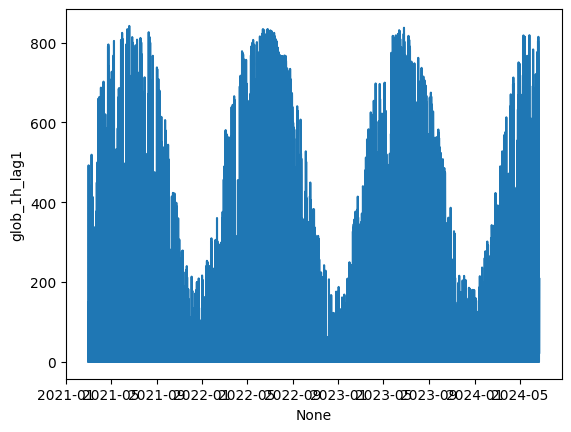

In [9]:
fig = sns.lineplot(x=df_handled.index, y=df_handled['glob_1h_lag1'])

In [10]:
# Scale inputs
df_scaled = scale_with_minmax(df_variables, str_model)

In [11]:
# Generate sequences
n_lookback = 20
n_ahead = 6
n_offset = 6
target_var = 'base_lag0'

df_seq = generate_sequences(df_scaled, target_var, n_lookback, n_ahead, continuous=False)

In [12]:
# Save variables
x_train = df_seq[0]
x_test = df_seq[1]
y_train = df_seq[2]
y_test = df_seq[3]

### Model Initiation & Training

In [72]:
# Initialize lstm class
lstm = simpleLSTM()
deepl = DeepLearner()

#### Grid Search

In [73]:
# Grid Search hyperparameters
hyperparams = {
    'units_l1': [100, 200],
    'units_l2': [100, 200],
    'dropout_l1': [0.1, 0.2],
    'dropout_l2': [0.1, 0.2],
    'activation_l1': ["sigmoid", "tanh"],
    'activation_l2': ['sigmoid', 'tanh']
}

lookback_periods = [84, 112]

lookback_dict = deepl.get_grid_train_dict(lookback_periods, df_scaled, target_var) # kwargs possible

In [74]:
#results, best_model, best_loss = deepl.grid_search_lstm(lookback_dict, hyperparams)

The optimum model is configured with the option 58, representing the following specifics: 

{'units_l2': 100,
 'units_l1': 200,
 'dropout_l2': 0.1,
 'dropout_l1': 0.2,
 'activation_l2': 'tanh',
 'activation_l1': 'tanh'}

In [75]:
# Retrieve optimal model parameters
from sklearn.model_selection import ParameterGrid
option_grid = ParameterGrid(hyperparams)
opt_config = option_grid[58]

In [76]:
lstm_2l = lstm.build_2layer_lstm(x_train, y_train, **opt_config)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 20, 200)             │         172,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293,806 (1.12 MB)

 Trainable params: 293,806 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

None


#### Train Final Model

In [77]:
# Get training parameters
train_params = get_params_from_config(function='model_train', str_model='inlet1_lstm')

In [78]:
# Train Model
trained_lstm, lstm_hist = deepl.train_model(x_train, y_train, lstm_2l, **train_params, verbose_int=1)

Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0930 - val_loss: 0.0495 - learning_rate: 0.0010
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0527 - val_loss: 0.0420 - learning_rate: 0.0010
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0434 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - val_loss: 0.0361 - learning_rate: 0.0010
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0361 - val_loss: 0.0347 - learning_rate: 0.0010
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0362 - val_loss: 0.0283 - learning_rate: 0.0010
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0287 - val_loss: 0.0251 - learning_rate: 0.0010
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0316 - val_loss: 0.0228 - learning_rate: 0.0010
Epoch 9/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0317 - val_loss: 0.0208 - learning_rate: 0.0010
E

In [79]:
y_pred = trained_lstm.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


### Model Evaluation

In [80]:
# Rescale predictions
y_pred = inverse_transform_minmax(y_pred, 'inlet1_lstm', ['base_lag0'])
y_test = inverse_transform_minmax(y_test, 'inlet1_lstm', ['base_lag0']) 

In [81]:
# Convert prediction to df
start_date = '01.01.2024 00:00:00'
n_timestep = 1

df_ypred = convert_seq_to_df(y_pred, start_date, n_timestep)

In [82]:
# Convert test seq to df
df_ytest = convert_seq_to_df(y_test, start_date, n_timestep)

In [83]:
# Convert df to time series
ts_ypred = dailydf_to_ts(df_ypred)
ts_ytest = dailydf_to_ts(df_ytest)

In [84]:
# Calculate metrics
evaluations.get_eval_metrics(ts_ytest, ts_ypred)

{'mae': 0.36523608908083893,
 'mse': 0.31149900764815275,
 'rmse': 0.558120961484294,
 'mape': 0.36523608908083893,
 'non-na%': 1.0,
 'n_actual_obs': 2118,
 'n_pred_nas': 0}

<Axes: xlabel='time', ylabel='value'>

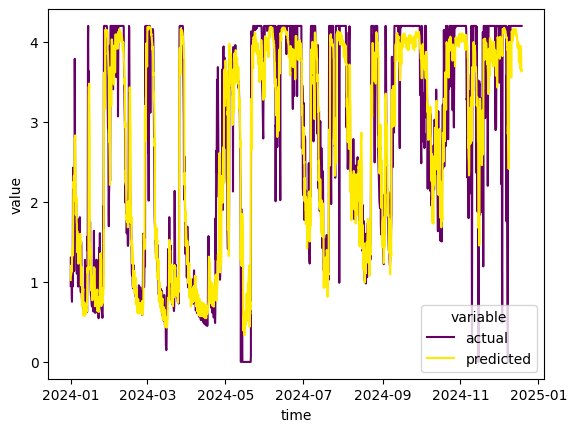

In [86]:
evaluations.get_act_vs_pred_plot(ts_ytest, ts_ypred)

### Results

#### EPAG RNN Benchmark model

The benchmark model performs as follows:

{'mae': 0.42552994824696827,
 'mse': 0.43365600821587413,
 'rmse': 0.6585256321631483,
 'mape': 0.42552994824696827,
 'non-na%': 1.0,
 'n_actual_obs': 28952,
 'n_pred_nas': 24}

#### 2-Layer LSTM, **28d lookback** period for 24h prediction, **zero-lag features**

The model performs slightly better than the benchmark EPAG RNN model, leading to the following metrics:

{'mae': 0.42610932601495455,
 'mse': 0.4287221795833913,
 'rmse': 0.6547687985719779,
 'mape': 0.42610932601495455,
 'non-na%': 1.0,
 'n_actual_obs': 2088,
 'n_pred_nas': 0}

The model was configured using the following specifications:

 {'units_l2': 100,
 'units_l1': 200,
 'dropout_l2': 0.1,
 'dropout_l1': 0.2,
 'activation_l2': 'tanh',
 'activation_l1': 'tanh'}

To derive these results, the following features were used:

- base_lag0
- base_1d_lag0
- temp_1h_lag0
- glob_1h_lag0
- rain_1h_lag0
- bf15_1h_lag0
- schmelz_1h_lag0

#### 2-Layer LSTM, **5d lookback** period for 24h prediction, **zero-lag features**

Compared to the longer-term models, the 5d lookback model (n_lookback = 20) **considerably outperforms**, yielding an improvement of 600 bps (expressed as mape decline). This looks highly promising, motivating further concentration on this model type.

{'mae': 0.36480787565215506,
 'mse': 0.32394114472592256,
 'rmse': 0.5691582773938393,
 'mape': 0.36480787565215506,
 'non-na%': 1.0,
 'n_actual_obs': 2118,
 'n_pred_nas': 0}

 The model specifications again were derived by using the following specifications:

{'units_l2': 100,
 'units_l1': 200,
 'dropout_l2': 0.1,
 'dropout_l1': 0.2,
 'activation_l2': 'tanh',
 'activation_l1': 'tanh'}

 To derive these results, the following features were used:

- base_lag0
- base_1d_lag0
- temp_1h_lag0
- glob_1h_lag0
- rain_1h_lag0
- bf15_1h_lag0
- schmelz_1h_lag0

#### 2-Layer LSTM, **4d lookback** period for 24h prediction, **zero-lag features**

Again, the 4d lookback model (n_lookback = 16) outperforms the more backward-looking models, however cannot manage to catch up to the 5d lookback model. 

{'mae': 0.42522474063231636,
 'mse': 0.4244721786739539,
 'rmse': 0.6515152942747806,
 'mape': 0.42522474063231636,
 'non-na%': 1.0,
 'n_actual_obs': 2118,
 'n_pred_nas': 0}

The model specifications again were derived by using the following specifications:

{'units_l2': 100,
 'units_l1': 200,
 'dropout_l2': 0.1,
 'dropout_l1': 0.2,
 'activation_l2': 'tanh',
 'activation_l1': 'tanh'}

 To derive these results, the following features were used:

- base_lag0
- base_1d_lag0
- temp_1h_lag0
- glob_1h_lag0
- rain_1h_lag0
- bf15_1h_lag0
- schmelz_1h_lag0

#### 2-Layer LSTM, **5d lookback** period for 24h prediction, **lagged features** with **offset**

With lagged features, the model still outperforms most other models across all metrics for a lookback period of 20, despite the offset period of 6*4h. This simulates performance under go-live conditions, indicating the model to be robust against the limitations of real-world use. The model's metrics look as follows:

{'mae': 0.36523608908083893,
 'mse': 0.31149900764815275,
 'rmse': 0.558120961484294,
 'mape': 0.36523608908083893,
 'non-na%': 1.0,
 'n_actual_obs': 2118,
 'n_pred_nas': 0}

 The model specifications were again derived by using the following specifications:

 {'units_l2': 100,
 'units_l1': 200,
 'dropout_l2': 0.1,
 'dropout_l1': 0.2,
 'activation_l2': 'tanh',
 'activation_l1': 'tanh'}

 To derive these results, the following features were used:

 - base_lag0
 - base_1d_lag0
 - temp_1h_lag1
 - glob_1h_lag1
 - glob_1h_lag2
 - glob_1h_lag3
 - rain_1h_lag1
 - rain_1h_lag2
 - rain_1h_lag3
 - bf15_1h_lag0
 - bf15_1h_lag1
 - bf15_1h_lag2
 - bf15_1h_lag3
 - schmelz_1h_lag1
 - schmelz_1h_lag2
 - schmelz_1h_lag3